In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings

In [24]:
df_movie =pd.read_csv('movies.dat',sep='::',engine='python')
df_movie.columns =['MovieIDs','MovieName','Category']
df_movie.dropna(inplace=True)

In [25]:
df_movie.head()


,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [26]:
df_rating = pd.read_csv('ratings.dat',sep='::',engine='python')
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)

In [27]:
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268


In [28]:
df_user = pd.read_csv("users.dat",sep='::',engine='python')
df_user.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_user.dropna(inplace=True)
df_user.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117


In [29]:
df = pd.concat([df_movie, df_rating,df_user], axis=1)
df.head()


,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117


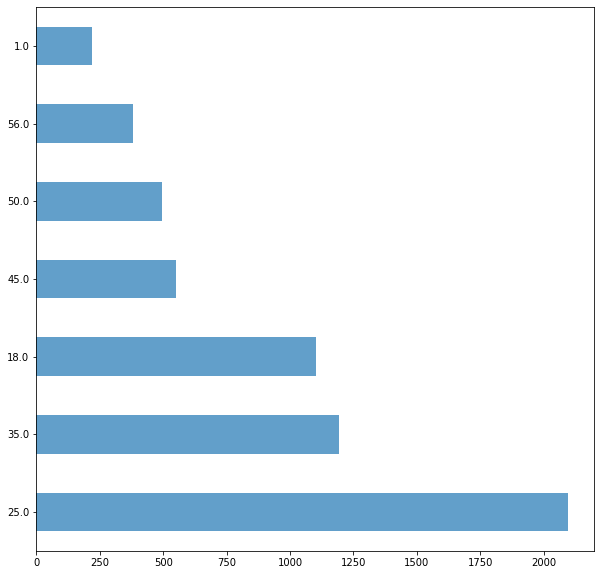

In [30]:
#Visualize user age distribution
df['Age'].value_counts().plot(kind='barh',alpha=0.7,figsize=(10,10))
plt.show()

Text(0.5, 0, 'Age')

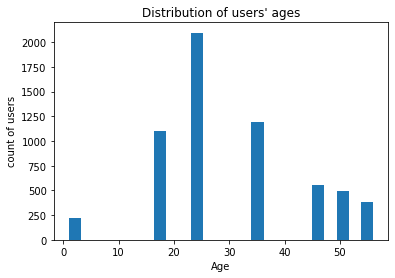

In [31]:
df.Age.plot.hist(bins=25)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('Age')

In [32]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group'] = pd.cut(df.Age, range(0, 81, 10), right=False, labels=labels)
df[['Age', 'age_group']].drop_duplicates()[:10]

,Age,age_group
0,56.0,50-59
1,25.0,20-29
2,45.0,40-49
4,50.0,50-59
5,35.0,30-39
16,18.0,10-19
17,1.0,0-9
6039,NaN,NaN


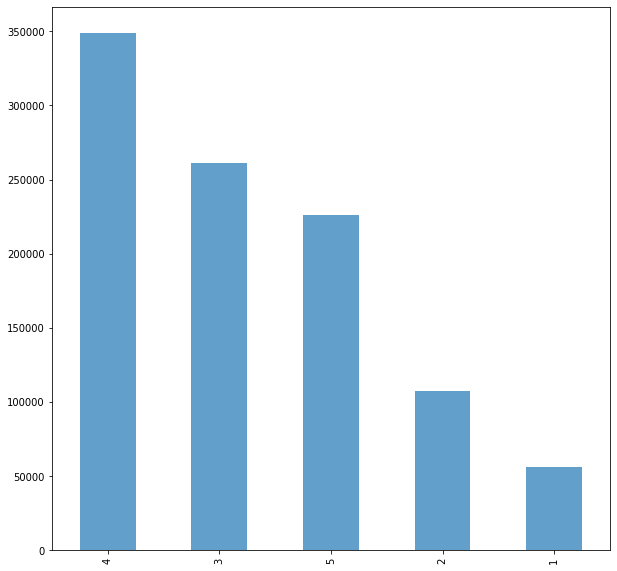

In [33]:
#Visualize overall rating by users
df['Ratings'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))
plt.show()

In [37]:
groupedby_movieName = df.groupby('MovieName')
groupedby_rating = df.groupby('Ratings')
groupedby_uid = df.groupby('UserID')
#groupedby_age = df.loc[most_50.index].groupby(['MovieName', 'age_group'])

In [38]:
movies = df.groupby('MovieName').size().sort_values(ascending=True)[:1000]
print(movies)

MovieName
$1,000,000 Duck (1971)                   1
Only Angels Have Wings (1939)            1
Only You (1994)                          1
Open Season (1996)                       1
Open Your Eyes (Abre los ojos) (1997)    1
                                        ..
Toy Story 2 (1999)                       1
Toys (1992)                              1
Total Eclipse (1995)                     1
Trading Places (1983)                    1
Tom & Viv (1994)                         1
Length: 1000, dtype: int64


In [39]:
ToyStory_data = groupedby_movieName.get_group('Toy Story 2 (1999)')
ToyStory_data.shape

(1, 13)

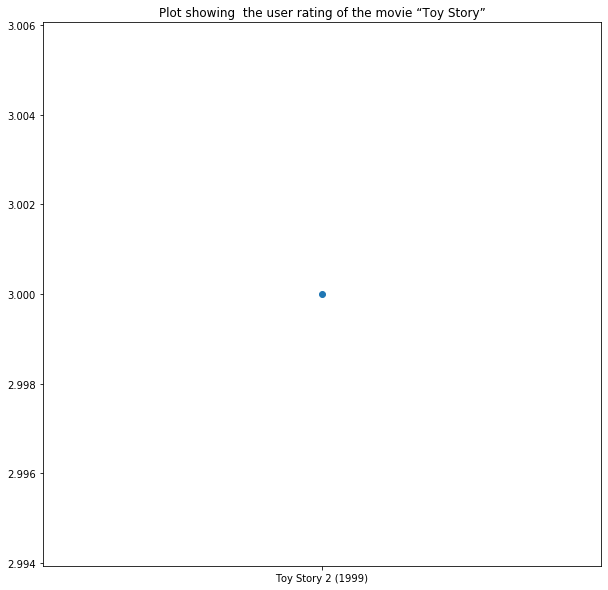

In [40]:
#Find and visualize the user rating of the movie “Toy Story”
plt.figure(figsize=(10,10))
plt.scatter(ToyStory_data['MovieName'],ToyStory_data['Ratings'])
plt.title('Plot showing  the user rating of the movie “Toy Story”')
plt.show()

In [41]:
#Find and visualize the viewership of the movie “Toy Story” by age group
ToyStory_data[['MovieName','age_group']]

,MovieName,age_group
3044,Toy Story 2 (1999),0-9


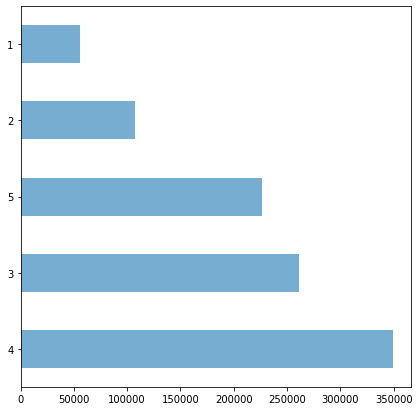

In [42]:
#Find and visualize the top 25 movies by viewership rating
top_25 = df[25:]
top_25['Ratings'].value_counts().plot(kind='barh',alpha=0.6,figsize=(7,7))
plt.show()

In [43]:
#Visualize the rating data by user of user id = 2696
userid_2696 = groupedby_uid.get_group(2696)
userid_2696[['UserID','Ratings']]

,UserID,Ratings
2694,2696.0,3


# Perform machine learning on first 500 extracted records

In [45]:
#First 500 extracted records
first_500 = df[500:]
first_500.dropna(inplace=True)

C:\Users\a1\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
#Use the following features:movie id,age,occupation
features = first_500[['MovieID','Age','Occupation']].values

In [47]:
#Use rating as label
labels = first_500[['Ratings']].values

In [48]:
from sklearn.model_selection import train_test_split


#Create train and test data set
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

Text(0.5, 0, 'Ratings')

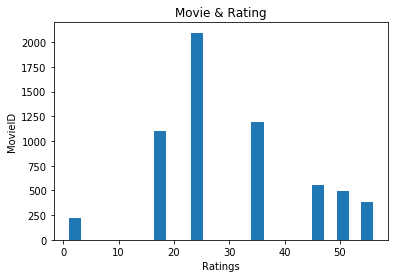

In [49]:
#Create a histogram for movie
df.Age.plot.hist(bins=25)
plt.title("Movie & Rating")
plt.ylabel('MovieID')
plt.xlabel('Ratings')

Text(0.5, 0, 'Ratings')

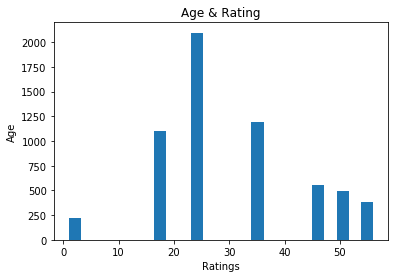

In [50]:
#Create a histogram for age
df.Age.plot.hist(bins=25)
plt.title("Age & Rating")
plt.ylabel('Age')
plt.xlabel('Ratings')

In [65]:
# Logistic Regression
#train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)
from sklearn.linear_model import LogisticRegression
lg =LogisticRegression()
lg.fit(train, train_labels)
lg.predict
#logreg = LogisticRegression()
#logreg.fit(train, train_labels)
#Y_pred = logreg.predict(test)
#acc_log = round(logreg.score(train, train_labels) * 100, 2)
#acc_log


C:\Users\a1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\a1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\a1\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<bound method LinearClassifierMixin.predict of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)>

In [59]:
lg.score(train, train_labels)

0.32980132450331123

In [73]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC

svc = SVC()
svc.fit(train, train_labels)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(train, train_labels) * 100, 2)
acc_svc

C:\Users\a1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\a1\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


96.42

In [74]:
# K Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn

C:\Users\a1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


57.57

In [68]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(train, train_labels)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(train, train_labels) * 100, 2)
acc_gaussian

C:\Users\a1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


32.23

In [69]:
from sklearn.linear_model import Perceptron
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron


C:\Users\a1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


28.61

In [71]:

from sklearn.tree import DecisionTreeClassifier



decision_tree = DecisionTreeClassifier()
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(train, train_labels) * 100, 2)
acc_decision_tree

C:\Users\a1\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


98.54

In [72]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(train, train_labels)
Y_pred = random_forest.predict(test)
random_forest.score(train, train_labels)
acc_random_forest = round(random_forest.score(train, train_labels) * 100, 2)
acc_random_forest

C:\Users\a1\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\a1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


98.54

In [76]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(train, train_labels)
Y_pred = sgd.predict(test)
acc_sgd = round(sgd.score(train, train_labels) * 100, 2)
acc_sgd

C:\Users\a1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


28.79

In [77]:
from sklearn.linear_model import Perceptron
# Perceptron

perceptron = Perceptron()
perceptron.fit(train, train_labels)
Y_pred = perceptron.predict(test)
acc_perceptron = round(perceptron.score(train, train_labels) * 100, 2)
acc_perceptron

C:\Users\a1\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


28.61

In [80]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent',  
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.54
7,Decision Tree,98.54
0,Support Vector Machines,96.42
1,KNN,57.57
2,Logistic Regression,32.98
4,Naive Bayes,32.23
6,Stochastic Gradient Decent,28.79
5,Perceptron,28.61


# Random Forest	98.54

# Decision Tree	98.54